## Data Exploratory Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
parking=pd.read_excel('parking.xls')

In [3]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [4]:
parking.tail()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
9055,FALLON,NV,ACTIVE,BUILDING,12,LEASED
9056,ELKO,NV,ACTIVE,BUILDING,2,LEASED
9057,LAS VEGAS,NV,ACTIVE,BUILDING,3,LEASED
9058,LAS VEGAS,NV,ACTIVE,BUILDING,24,LEASED
9059,LAS VEGAS,NV,ACTIVE,BUILDING,7,LEASED


In [5]:
parking['Bldg Status'].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [6]:
parking['Property Type'].value_counts()

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

In [7]:
parking.columns

Index(['Bldg City', 'Bldg State', 'Bldg Status', 'Property Type',
       'Total Parking Spaces', 'Owned/Leased'],
      dtype='object')

# 1.What is the distribution or values for owned/leased?

<BarContainer object of 9060 artists>

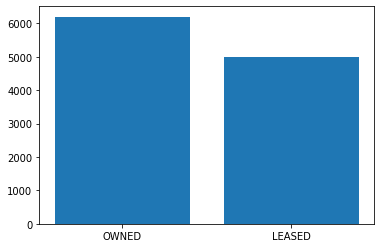

In [8]:
plt.bar(parking['Owned/Leased'],parking['Total Parking Spaces'])

In [9]:
owned_leased=pd.pivot_table(parking,index='Owned/Leased',values='Total Parking Spaces',aggfunc='count')

In [10]:
owned_leased

,Total Parking Spaces
Owned/Leased,
LEASED,6940
OWNED,2120


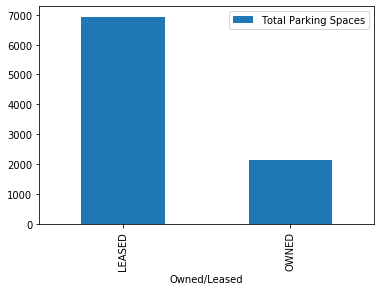

In [11]:
owned_leased.plot(kind='bar')

# 2.In which building state parking situation is excess-Put in a order

In [12]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [13]:
parking['Bldg Status'].unique()

array(['ACTIVE', 'DECOMMISSIONED', 'EXCESS'], dtype=object)

In [14]:
excess_parking=pd.pivot_table(parking,index='Bldg State',columns='Bldg Status',values='Total Parking Spaces')

In [15]:
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
AR,37.000000,NaN,NaN
AZ,32.256757,NaN,NaN
CA,60.493298,NaN,NaN
CO,78.936709,NaN,22.200000
CT,29.327586,NaN,NaN
DC,41.255144,NaN,NaN
DE,15.750000,NaN,NaN
FL,51.905569,NaN,NaN


In [16]:
excess_parking=excess_parking[excess_parking.EXCESS>0]
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
CO,78.936709,NaN,22.200000
IL,45.000000,NaN,21.000000
LA,43.684932,NaN,68.666667
MD,104.185090,0.000000,43.166667
MO,121.200000,815.333333,254.272727
NE,54.060000,NaN,19.000000
NJ,32.169118,NaN,4.300000
NV,48.648649,NaN,173.000000


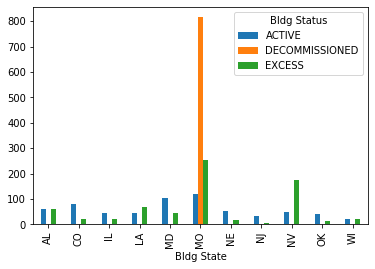

In [17]:
excess_parking.plot(kind='bar')

<BarContainer object of 11 artists>

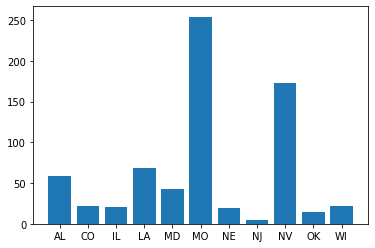

In [18]:
plt.bar(excess_parking.index,excess_parking.EXCESS)

In [19]:
excess_parking_sorted=excess_parking.EXCESS.sort_values()
excess_parking_sorted

Bldg State
NJ      4.300000
OK     14.000000
NE     19.000000
IL     21.000000
WI     22.000000
CO     22.200000
MD     43.166667
AL     59.000000
LA     68.666667
NV    173.000000
MO    254.272727
Name: EXCESS, dtype: float64

<BarContainer object of 11 artists>

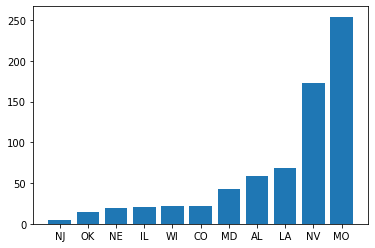

In [20]:
plt.bar(excess_parking_sorted.index,excess_parking_sorted.values)

#  3.Bldg City that have been decommisioned along with total parking

In [21]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [28]:
decom_parking_city=parking[parking['Bldg Status']=='DECOMMISSIONED']
decom_parking_city

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
429,PORTHILL,ID,DECOMMISSIONED,BUILDING,0,OWNED
1933,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
1934,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
2338,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
2348,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED
5726,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,0,OWNED
6752,FORT WORTH,TX,DECOMMISSIONED,BUILDING,0,OWNED


# 3.In which type of property parking space is in excess

In [29]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [31]:
excess_parking_property=pd.pivot_table(parking[parking['Bldg Status']=='EXCESS'],index='Property Type',values='Total Parking Spaces')
excess_parking_property


,Total Parking Spaces
Property Type,
BUILDING,57.791045
STRUCTURE,37.000000


#  5.Where is more active parking? Owned/leased

In [32]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [34]:
active_parking=pd.pivot_table(parking[parking['Bldg Status']=='ACTIVE'],index='Owned/Leased',values='Total Parking Spaces')
active_parking

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.365997


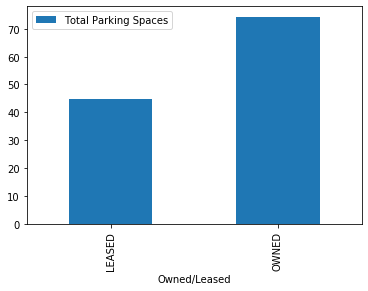

In [36]:
active_parking.plot(kind='bar')

In [37]:
active_parking.sum()

Total Parking Spaces    119.073346
dtype: float64

In [39]:
active_parking['Total Parking Spaces']/active_parking['Total Parking Spaces'].sum()

Owned/Leased
LEASED    0.375461
OWNED     0.624539
Name: Total Parking Spaces, dtype: float64

In [42]:
active_parking['%Contri']=active_parking['Total Parking Spaces']/active_parking['Total Parking Spaces'].sum()

In [43]:
active_parking

,Total Parking Spaces,%Contri
Owned/Leased,,
LEASED,44.707349,0.375461
OWNED,74.365997,0.624539


#  6.States with more leased parking

In [44]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [47]:
state_leased_parking=pd.pivot_table(parking[parking['Owned/Leased']=='LEASED'],index='Bldg State',values='Total Parking Spaces')
state_leased_parking

,Total Parking Spaces
Bldg State,
AL,64.055556
AR,28.098592
AZ,38.025806
CA,44.639810
CO,58.647727
CT,26.134615
DC,42.562914
DE,15.592593
FL,49.102828


In [51]:
state_leased_parking.sort_values('Total Parking Spaces',ascending=False)

,Total Parking Spaces
Bldg State,
MO,107.762821
TX,73.457086
VA,72.476316
AL,64.055556
UT,62.505882
GA,62.425414
CO,58.647727
VT,56.128205
NM,51.926316


# 7.Which property type has more active parking?


In [52]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [56]:
active_parking=pd.pivot_table(parking[parking['Bldg Status']=='ACTIVE'],index='Property Type',values='Total Parking Spaces')
active_parking.sort_values('Total Parking Spaces',ascending=False)

,Total Parking Spaces
Property Type,
STRUCTURE,70.779762
BUILDING,51.134764
LAND,19.268908


# 8.how is the distribution of parking in city by property type?

In [57]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [64]:
parking_dis=pd.pivot_table(parking,index='Property Type',values='Total Parking Spaces',aggfunc='count')

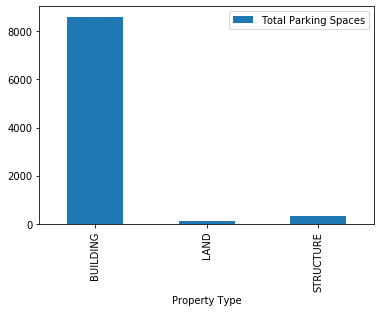

In [65]:
parking_dis.plot(kind='bar')

# 9.Building states which has 0 parking spaces

In [66]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [73]:
parking_spaces=pd.pivot_table(parking,index='Bldg State',values='Total Parking Spaces')

In [74]:
parking_spaces['Total Parking Spaces']==0

Bldg State
AL    False
AR    False
AZ    False
CA    False
CO    False
CT    False
DC    False
DE    False
FL    False
GA    False
IA    False
ID    False
IL    False
IN    False
KS    False
KY    False
LA    False
MA    False
MD    False
ME    False
MI    False
MN    False
MO    False
MS    False
MT    False
NC    False
ND    False
NE    False
NH    False
NJ    False
NM    False
NV    False
NY    False
OH    False
OK    False
OR    False
PA    False
RI    False
SC    False
SD    False
TN    False
TX    False
UT    False
VA    False
VT    False
WA    False
WI    False
WV    False
WY    False
Name: Total Parking Spaces, dtype: bool

# 10.What are those states which has maximum and minimum parking spaces?